*Luka Alhonen*

# Exercise 4

## 1 Non-programming Tasks

### 1.1 Learning diary

#### Feature Engineering

Feature engineering is used to highlight important aspects and patterns in data and involves two processes, namely Feature Extraction and Feature Selection. As the name implies, Feature Extraction is the process of extracting key, relevant features from a signal. Usually, a large amount of features are extracted, analysed and then only the most relevant ones are chosen during the Feature Selection phase. The two main categories of features are time domain features and frequency domain features. The simplest and most frequently used features in time domain are related to descriptive statistics, for example mean, median, min, max and standard deviation. In the frequency domain, features are chosen from the Fast Fourier Transform output of a signal, which, for example, include direct current, spectral energy and dominant frequency.


#### Data Modelling

The final phase of the sensing pipeline, the data modelling phase, is responsible for producing output from the pipeline and has three different types; supervised, unsupervised and reinforcement learning. In supervised learning we have knowledge of the output and the aim is to predict the class, label, or value of an input based on previously observed input-output pairs. This can for example be labelling images. On the other hand, in unsupervised learning, we don’t have knowledge of the output and the aim is to discover structures of patterns in the data. This can, for example, be classifying images as either bicycles or motorcycles. In reinforcement learning we don’t have complete knowledge of the output and receives feedback on the decisions or estimates.

## Programming Tasks

### 2.1 Feature Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

In [2]:
df = pd.read_csv('HR.csv')

#### 1.

I used the python library rupture with the Pelt algorithm to detect the change points and then plot them. From plots 1.1 and 1.2, I could identify 5 major activities.

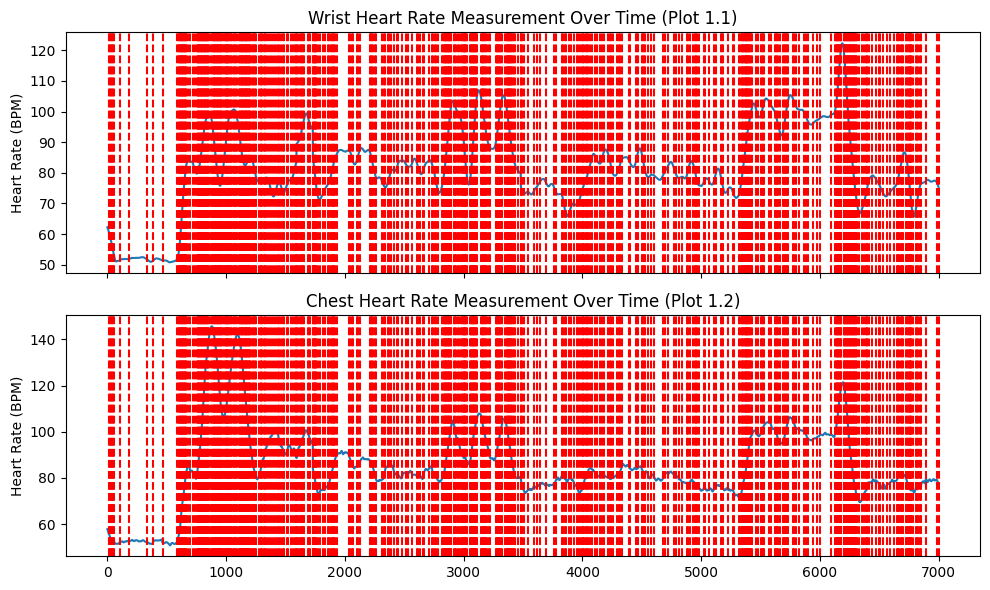

In [3]:
data = df.values

model = "l2"
algo = rpt.Pelt(model=model).fit(data)

pen = 10
result = algo.predict(pen=pen)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

df['wrist'].plot(ax=ax1)
ax1.set_title('Wrist Heart Rate Measurement Over Time (Plot 1.1)')
ax1.set_ylabel('Heart Rate (BPM)')

df['chest'].plot(ax=ax2)
ax2.set_title('Chest Heart Rate Measurement Over Time (Plot 1.2)')
ax2.set_ylabel('Heart Rate (BPM)')

for xc in result:
    ax1.axvline(x=xc, color='r', linestyle='--')
    ax2.axvline(x=xc, color='r', linestyle='--')

plt.tight_layout()
plt.show()

#### 2.



In [4]:
def preprocessing_signal(frame, window_size):
    return frame.rolling(window_size).mean()

In [5]:
def extract_features(frame):
    return [frame.mean(), frame.median(), frame.min(), frame.max(), frame.std()]

In [6]:
frame_size = 250
overlap_50 = frame_size // 2
window_size = 50
chest = df['chest']
chest_features = []
for i in range(0, len(chest), overlap_50):
    chest_frame = chest[i:i+frame_size]
    chest_preprocessed = preprocessing_signal(chest_frame, window_size)
    frame_features = extract_features(chest_preprocessed)
    chest_features.append(frame_features)

chest_features_df = pd.DataFrame(chest_features, columns=['mean', 'median', 'min', 'max', 'std'])

print(chest_features_df)


          mean      median         min         max        std
0    52.518129   52.462306   51.701857   54.608377   0.563026
1    52.646543   52.728264   51.847408   52.939180   0.252210
2    52.476095   52.581334   51.718738   53.025530   0.391292
3    52.352202   52.228934   51.450347   55.960424   0.813128
4    66.844385   65.176040   51.450347   84.145471  13.495162
5    94.946089   84.091850   76.223223  137.516676  18.066361
6   124.670398  126.738248   90.725533  143.729844  15.269927
7   124.352747  124.310416  108.390813  140.671320  11.268938
8   121.966143  126.790064   87.232529  140.671320  16.760291
9    92.389506   89.491224   80.748432  122.394110  11.149116
10   93.858777   95.310277   81.328158  100.149650   5.501810
11   93.994108   92.669231   90.904628  100.149650   3.132702
12   94.611484   93.137436   90.359414   99.443711   3.023391
13   84.926398   80.314026   74.174924   99.443711  10.442415
14   81.563846   79.665290   74.174924   90.887988   6.495211
15   88.

#### 3.

Based on plots 2.1, 2.2, 2.3, 2.4, 2.5 the features that best represent the different are median (plot 2.2) and standard deviation (plot 2.5).

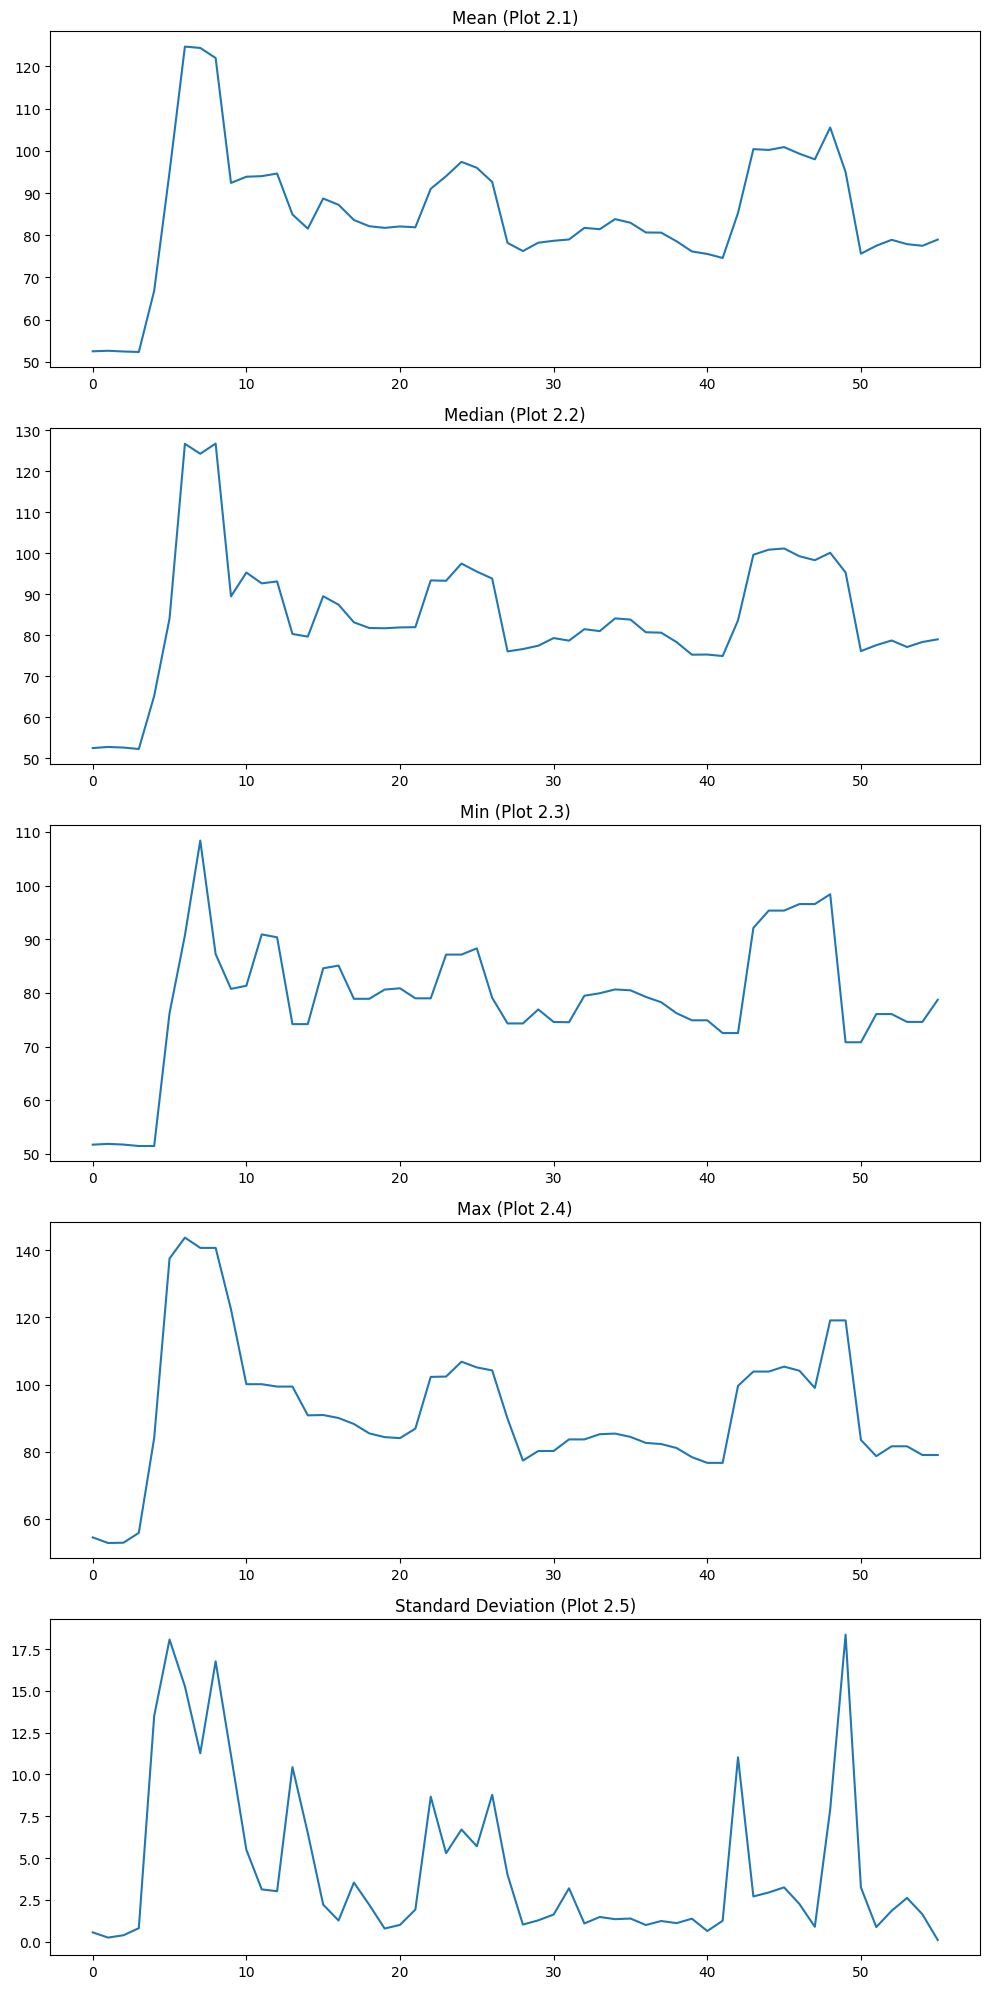

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10,20))

chest_features_df['mean'].plot(ax=ax1)
ax1.set_title('Mean (Plot 2.1)')

chest_features_df['median'].plot(ax=ax2)
ax2.set_title('Median (Plot 2.2)')

chest_features_df['min'].plot(ax=ax3)
ax3.set_title('Min (Plot 2.3)')

chest_features_df['max'].plot(ax=ax4)
ax4.set_title('Max (Plot 2.4)')

chest_features_df['std'].plot(ax=ax5)
ax5.set_title('Standard Deviation (Plot 2.5)')

plt.tight_layout()
plt.show()

#### 4.



In [8]:
def extract_median_std(frame):
    return [frame.median(), frame.std()]

In [9]:
wrist = df['wrist']
wrist_features = []
for i in range(0, len(wrist), overlap_50):
    wrist_frame = wrist[i:i+frame_size]
    wrist_preprocessed = preprocessing_signal(wrist_frame, window_size)
    frame_features = extract_median_std(wrist_preprocessed)
    wrist_features.append(frame_features)

wrist_features_df = pd.DataFrame(wrist_features, columns=['median', 'std'])

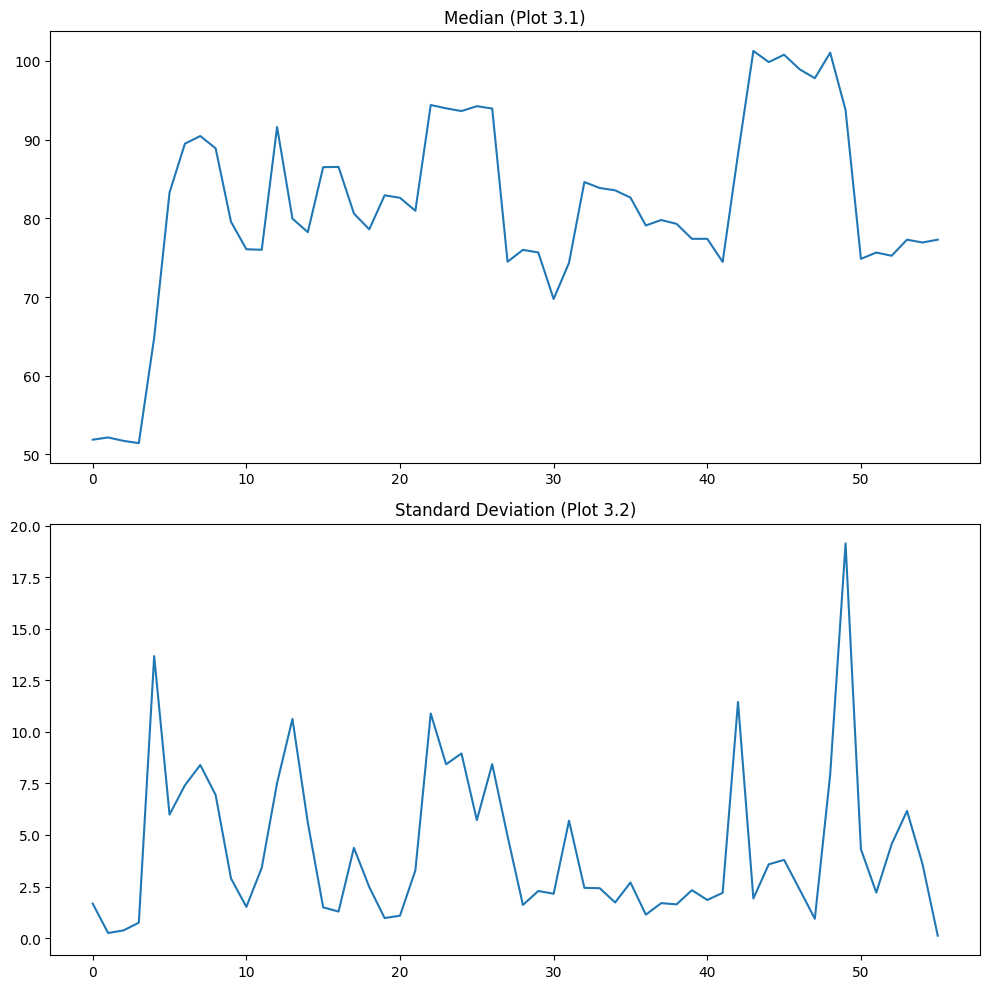

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

wrist_features_df['median'].plot(ax=ax1)
ax1.set_title('Median (Plot 3.1)')

wrist_features_df['std'].plot(ax=ax2)
ax2.set_title('Standard Deviation (Plot 3.2)')

plt.tight_layout()
plt.show()